## Getting Data from API's with Python

**GW Libraries and Academic Innovation**

Monday, October 5, 2020

### Workshop goals

This workshop will cover basic use cases for retrieving data from RESTful API's with Python. 

By the conclusion of this workshop, you will have worked through the following:

* Understanding the REST framework for data retrieval
* Constructing a query with parameters in Python using the `requests` library
* Writing a `for` loop to retrieve multiple sets results
* Parsing a JSON response
* Exporting data in CSV format

### Tips for using this Google Colab notebook

When working in a Google Colaboratory notebook, `Shift-Return` (`Shift-Enter`) runs the cell you're on. You can also run the cell using the `Play` button at the left edge of the cell.

There are many other keyboard shortcuts. You can access the list via the menu bar, at `Tools`-->`Command palette`. In fact, you can even customize your keyboard shortcuts using `Tools`-->`Keyboard shortcuts`.

(If you're working in an Anaconda/Jupyter notebook: 
 - `Control-Enter` (`Command-Return`) runs the cell you're on. You can also run the cell using the `Run` button in the toolbar. `Esc`, then `A` inserts a cell above where you are.
 - `Esc`, then `B` inserts a cell below where you are.
 - More shortcuts under `Help` --> `Keyboard Shortcuts`)

You will probably get some errors in working through this notebook. That's okay, you can just go back and change the cell and re-run it.

The notebook auto-saves as you work, just like gmail and most Google apps.

### Introduction

#### What is an API?

An **A**pplication **P**rogramming **I**nterface is a generic term for functionality that allows one computer application to talk to another. In contrast to a graphical user interface (GUI), which allows an end user to interact with an application via visual symbols (*e.g.* icons) and manual operations (*e.g.* mouse clicks), an API allows a user to interact with the application by writing code. 


You can think of API's as the glue that holds together the various modules and libraries of code that make up a given system, whether we're talking about a single piece of software or the entire World Wide Web.

-------------------------

#### What is REST?

**R**epresentational **S**tate **T**ransfer refers to a common set of principles implemented by services that communicate via the web. Most RESTful API's use **HTTP** to provide access. Via HTTP and its core methods, you code can communicate with a web service the way your browser does when you visit a web site. We'll see how to write code to do just that in this workshop.   

### Setup

We're going to use a couple of libraries for making API calls and processing the data these calls return. They are not part of the standard Python distribution, but they're pre-installed for Google Colaboratory notebooks. If you're running a Jupyter notebook locally on your computer via the Anaconda distribution of Python, they are pre-installed there as well. If not, you can install them yourself by running these commands inline in your notebook:

`!pip install pandas`

`!pip intall requests`

You can also install them at the command line by using the above commands *without* the prefixed exclamation point.

### Using API's to find and rerieve COVID-19 data

First we need to import the libraries we're using to work with this data.

As a refresher:
 - `import` loads an external Python library for use in your code.
 - `as` with `import` allows us to provide a nickname for the library, so that we don't have type the full name each time.

In [1]:
import requests
import pandas as pd

#### A straightforward request with JSON

The first data set we'll use is provided by _The Atlantic_'s [Covid Tracking Project](https://covidtracking.com/data/api).

Let's take a moment to look at the documentation together.

This API is fairly straightforward. We can retrieve the results in either JSON or CSV. We'll be using JSON, primarily to familiarize ourselves with this format, which is quite common for RESTful API's. 

**J**ava**S**cript **O**bject **N**otation is a data format designed to map readily onto Javascript data types. As it happens, it also maps readily onto Python data types.  

We'll use the API **endpoint** for "Historic US Values" in JSON format. API documentation will often refer to multiple endpoints, each of which provides access to a different set or view of data. This endpoint provides time series data for COVID-19 cases in the US.

In [2]:
covid_us_url = 'https://api.covidtracking.com/v1/us/daily.json'

To fetch the data from the endpoint, we use the `requests` library, calling the `get` method and passing as an argument the endpoint URL. 

`GET` is one of several HTTP "verbs," which correspond to different actions a web server can be asked to perform. `GET` means, _Give me the data stored at this particular URL path_. 

In [3]:
resp = requests.get(covid_us_url)

`requests.get` returns a `Response` object. This Python object has many useful properties. It's important to remember that with HTTP services, there can be many reasons why your request for data might fail. 

Common issues include the following:

- The server might be down.
- You might have used an incorrect or defunct URL.
- You might not have the right permissions.

Because of that, our `Response` object contains more than **just** the data we have requested. 

It contains a `status_code` property, which lets us know what **kind** of response the server gave. Anything other than `200` means that the request failed.


In [4]:
resp.status_code

200

The `Response` object also contains the response **headers** sent by the server. Every web server you visit transmits one or more headers to the client you're using (web browser, etc.). Most of the time you don't need to worry about these, but when programming with API's, you may find them useful.

The `Content-Type` header, for instance, lets us confirm that the data we received was in fact formatted as JSON.

Note that our `Response` object has converted these headers to a Python dictionary for ease of access.

In [5]:
resp.headers

{'Accept-Ranges': 'bytes', 'Access-Control-Allow-Origin': '*', 'Cache-Control': 'public, max-age=0, must-revalidate', 'Content-Type': 'application/json', 'Date': 'Tue, 08 Sep 2020 20:27:55 GMT', 'Etag': '"47923441b08292c93545cc7dc9150453-ssl-df"', 'Strict-Transport-Security': 'max-age=31536000', 'Content-Encoding': 'gzip', 'Age': '1180', 'Content-Length': '26589', 'Connection': 'keep-alive', 'Server': 'Netlify', 'Vary': 'Accept-Encoding', 'X-NF-Request-ID': 'eb593d65-ad46-41fc-a927-bce75efd52fc-14886776'}

Each HTTP response also has a **body**. This is either the data we have requested, or some type of error message. 

The data can be formatted in many different ways. Most plain web pages are formatted as `text/html`. This doesn't actually mean much to Python, since Python doesn't have an HTML data type. But you can view the contents of the body as a Python string by evaluating `resp.text`.

In [6]:
resp.text

'[{"date":20200907,"states":56,"positive":6276203,"negative":76573198,"pending":8986,"hospitalizedCurrently":31999,"hospitalizedCumulative":378907,"inIcuCurrently":6630,"inIcuCumulative":18156,"onVentilatorCurrently":1879,"onVentilatorCumulative":1967,"recovered":2333583,"dateChecked":"2020-09-07T00:00:00Z","death":181332,"hospitalized":378907,"lastModified":"2020-09-07T00:00:00Z","total":82858387,"totalTestResults":82849401,"posNeg":82849401,"deathIncrease":225,"hospitalizedIncrease":492,"negativeIncrease":559616,"positiveIncrease":28681,"totalTestResultsIncrease":588297,"hash":"23ba2e4ce89a07512fa56cc86442f9da440d644c"},{"date":20200906,"states":56,"positive":6247522,"negative":76013582,"pending":8946,"hospitalizedCurrently":32361,"hospitalizedCumulative":378415,"inIcuCurrently":6699,"inIcuCumulative":18125,"onVentilatorCurrently":1912,"onVentilatorCumulative":1960,"recovered":2316020,"dateChecked":"2020-09-06T00:00:00Z","death":181107,"hospitalized":378415,"lastModified":"2020-09-06

Notice the outer quotation marks alerting us that this is a string. A giant string is no fun to work with as data. Fortunately, if the body of the response has been correctly formatted as JSON, we can easily convert it to mre useful Python data types.

`resp.json()` converts the **body** of the response, which is the data we requested, into native Python types: strings, numeric types, lists, and dictionaries.

**Note**: Not all API's return JSON by default or even at all. Many use XML. If you call `.json()` on a `Response` that does not contain JSON-formatted data, Python will raise an exception.

In [7]:
data_us_daily = resp.json()

Let's look at this data. What Python data types do you see here?

In [8]:
data_us_daily

[{'date': 20200907,
  'states': 56,
  'positive': 6276203,
  'negative': 76573198,
  'pending': 8986,
  'hospitalizedCurrently': 31999,
  'hospitalizedCumulative': 378907,
  'inIcuCurrently': 6630,
  'inIcuCumulative': 18156,
  'onVentilatorCurrently': 1879,
  'onVentilatorCumulative': 1967,
  'recovered': 2333583,
  'dateChecked': '2020-09-07T00:00:00Z',
  'death': 181332,
  'hospitalized': 378907,
  'lastModified': '2020-09-07T00:00:00Z',
  'total': 82858387,
  'totalTestResults': 82849401,
  'posNeg': 82849401,
  'deathIncrease': 225,
  'hospitalizedIncrease': 492,
  'negativeIncrease': 559616,
  'positiveIncrease': 28681,
  'totalTestResultsIncrease': 588297,
  'hash': '23ba2e4ce89a07512fa56cc86442f9da440d644c'},
 {'date': 20200906,
  'states': 56,
  'positive': 6247522,
  'negative': 76013582,
  'pending': 8946,
  'hospitalizedCurrently': 32361,
  'hospitalizedCumulative': 378415,
  'inIcuCurrently': 6699,
  'inIcuCumulative': 18125,
  'onVentilatorCurrently': 1912,
  'onVentilato

We have a Python list of dictionaries, each of which has the same keys. This is a typical way to represent a table of data in Python.

The `pandas` library, however, provides the `DataFrame` type, which makes working with tabular data much easier.

The `DataFrame.from_records` method takes a list of Python dictionaries and converts it into a table, where the shared keys are the table columns, and the values become the values in each row.

In [9]:
data_us_daily = pd.DataFrame.from_records(data_us_daily)

Now we can really see the tabular nature of this data. From here, we can use `pandas` methods to clean, sort, filter, aggregate, and even plot the data. We can also export it easily to CSV.

We'll come back to `pandas` later in the workshop. For now, let's tackle a slightly more complicated API.

#### Making repeated requests

The `requests` library is great. But because HTTP requests can be complicated, there are certain steps we will usually want to take when making requests -- like checking for status errors, decoding content, etc. -- that can become repetitive if we have to write them out every time. 

So let's create a Python **function** to handle all of that housekeeping.

Our function will take some arguments: 
- a url
- an optional dictionary of URL parameters (to be explained later)
- an optional dictionary of HTTP headers

It will return:
- The body of the HTTP response, if the request succeeded.
- Otherwise, it will raise a Python exception.

In [11]:
def get_data(url, params=None, headers=None): # We'll talk about these later
    '''Accepts a url, which should be a string.
    Optionally, accepts a dictionary of URL parameters and a custom HTTP header.'''
    try:
        # We pass all our arguments to requests.get
        resp = requests.get(url, params=params,  
                           headers=headers)
        # If the response is anything other than 200, raise_for_status() will raise an exception
        resp.raise_for_status()        
        # Here we can check for a JSON response 
        # the expression headers.get('Content-Type', '') looks for a key of 'Content-Type' in the headers dictionary.
        # If it doesn't find one, it returns the empty string as a default, since some headers may not have Content-Type specified.
        if 'application/json' in resp.headers.get('Content-Type', ''):   
            # If the header says it's JSON, parse it as JSON
            data = resp.json()
            return data
        else:
            # Otherwise, just return the response as text
            return resp.text
    # Here we trap any errors and print a helpful message for the user
    except Exception as e:       # Here we catch errors
        print('Error fetching data from url', url)    
        print(resp.text)                            
        # This will cause the exception to bubble up in the stack trace, which is helpful for debugging
        raise                                          

If you've never used `try` and `except` before, these Python keywords provide ways for us to catch and handle errors gracefully. They are particularly useful when working with HTTP data, since you can't really predict how the web server you're sending requests to will behave. 

If no errors/exceptions occur in processing the `try` block, Python will skip the `except` block altogether. 

At the moment, our `except` block just prints an error message to the screen. But in other situations, you might want to log the errors to a file, or take some other action, depending on the type of error.

#### Getting COVID-19 data by country

The [COVID 19 API](https://covid19api.com/) collects data from various sources and provides it JSON format.

This API is a bit more complex, in that we need to specify both a country and a date range when making our requests.

We can check out the documentation on Postman:

[https://documenter.getpostman.com/view/10808728/SzS8rjbc](https://documenter.getpostman.com/view/10808728/SzS8rjbc)

If we consult the documentation for the endpoint **By Country Total**, we see that the URL should contain the name of the country in a specific format called a _slug_. (This is a format that removes spaces, capitalization, and characters that are more difficult to parse when constructing URL's.)

How do we find out the slug? There's an API endpoint for that, too. So our first step is to get the list of slugs and find the one for the country we want whose data we want to retrieve.

In [14]:
countries_url = 'https://api.covid19api.com/countries'
# We can use our new function to get this data 
country_metadata = get_data(countries_url)

Note how the country metadata is presented. Again, we have a list of dictionaries, each of which contains the name of a country, its slug, and its ISO code.

#### Exercise

To get data for a specific country, we can use the following URL:

```
covid_country_url = 'https://api.covid19api.com/total/country/{country_slug}/status/confirmed'
```
We need to replace the `country_slug` in curly braces with the actual slug for the country we are interested in.

How would you use `country_metadata` to look up the slug for a specific country by name, _e.g._, Germany? Use only Python code.

#### Answer

There are multiple valid approaches. Here's one handy way.

```
country_data_dict = {c['Country']: c for c in country_data}
```

This is called a **dictionary comprehension**. It's basically a `for` loop embedded in a Python dictionary expression. You can use comprehensions to create Python dicts, lists, and sets. 

Here we convert a list of dictionaries into a dictionary of dictionaries. That allows us to look up the metadata for each country by its more standard name.

In [16]:
country_data_dict = {c['Country']: c for c in country_data}

Now  we can find the slug like so:

In [17]:
germany_slug = country_data_dict['Germany']['Slug']

To create the URL for the _By Country Total_ endpoint, we can use string formatting. 

The part in curly braces will be replaced by whatever value we pass to a keyword argument to the `.format` method where the keyword is the same as the part in curly braces. 

Note the `.format` is actually a method defined on the string itself. All string objects in Python have this method available.

In [18]:
covid_country_url = 'https://api.covid19api.com/total/country/{country_slug}/status/confirmed'
germany_url = covid_country_url.format(country_slug=germany_slug)

To get country COVID data for a range of dates, we can supply a `from` and a `to` date as URL paramters. 

URL parameters are the parts of the URL that follow a question mark. They typically have the form `key=value` where `key` is the parameter name and `value` is the associated value. You can think of them like keywords you enter into a search engine using an Advanced Search form. 

Constructing a URL with parameters in Python is straightfoward with the `requests` library. As we've seen, it takes an optional keyword argument called `params`, which should be a dictionary mapping keys to values. 

The Covid API documentation indicates that the date value should conform to a particular format. Assuming we want data for each day starting at midnight, we can use string formatting to simplify creation of these parameters.

In [19]:
date_str = '{date}T00:00:00Z'

In [20]:
params = {'from': date_str.format(date='2020-03-01'),
         'to': date_str.format(date='2020-09-01')}

In [21]:
germany_data = get_data(germany_url, params=params)

#### Exercise

Can you write a function that accepts the following:
- a list of country names, e.g., `['Germany', 'China', 'Unites States of America']`
- a from-date
- a to date

and that returns the case data for those countries?

**Requirements** 
1. We want to be able to pass in the standard country names in English, not the slugs.
2. We want to pass in the dates as strings of the format YEAR-MONTH-DAY.
3. We want to receive a single list for all the data for all countries that we identified.
4. **Bonus**: If the user submits a country name that's not in the list, we want to catch it gracefully, printing an error message for the user but not breaking the function

**Answer**

In [23]:
def get_country_data(countries, from_date, to_date):
    '''First argument should be a Python list.
    Second and third arguments should be Python strongs of the format YEAR-MONTH-DAY.'''
    # Uses the date_str we defined above to create the parameters
    params = {'from': date_str.format(date=from_date), 
             'to': date_str.format(date=to_date)} 
    # An empty list to hold the data for all the countries
    all_data = []     
    # Loops through the list of contries
    for country in countries:                          
        try:
            # Uses our predefined dictionary to retrieve the slug
            # In a try/except block to catch cases where the country name we provided isn't in the dictionary
            slug = country_data_dict[country]['Slug']   
        # If a dictionary doesn't have a certain key, a KeyError is raised
        except KeyError:     
            # Error message for the user
            print("Country not found: ", country)
            # Goes to the next iteration of the loop
            continue             
        # Creates the URL for this country
        url = covid_country_url.format(country_slug=slug) 
        # Calls our predefined function
        data = get_data(url, params=params)  
        # Adds these results to the original set
        # Using extend (rather than append) prevents us from getting a list of lists
        all_data.extend(data)     
    # Don't forget to return something!
    return all_data                                    

In [43]:
three_countries = get_country_data(['Germany', 'China', 'United States of America'], 
                                   from_date='2020-03-01', 
                                   to_date='2020-09-09')

Assuming we used `.extend` to build our list, we can create a `DataFrame` with this data, which should be a single list of dictionaries.

In [44]:
comp_data = pd.DataFrame.from_records(three_countries)

A `DataFrame` has an extremely useful `.groupby` method, which allows us to summarize results by grouping rows by certain unique values. 

We can group our data by country to find the total number of cases per country. 

In [45]:
grp = comp_data.groupby('Country')
grp['Cases'].max()

Country
China                         90087
Germany                      254957
United States of America    6327009
Name: Cases, dtype: int64

We can even graph our data using `pandas` built-in plotting functions, which use `matplotlib` under the hood.

Our dataset contains the cumulative total by date for each country. If we want to plot date against case and country, the first step is to convert the date column to a datetime format that Python can recognize. (Datetime values transmitted via JSON will typically be either strings or integers.)

`pandas` makes such conversions fairly straightforward.

In [46]:
comp_data['Date'] = pd.to_datetime(comp_data['Date'])

In order to compare the data for multiple countries, the best approach is to `groupby` both `Country` and `Date` columns. This will create what's called a `MultiIndex` in `pandas` -- an index with two levels. It's similar to what you can do with a pivot table in Excel.

In [47]:
grp2 = comp_data.groupby(['Date', 'Country'])

Now if we take the `max` of the `Cases` column (on our `GroupBy` object), we an see that for each aggregate value in the `Cases` column, the first level is the date, the second is the country

In [50]:
comp_tbl = grp2['Cases'].max()

Unfortunately, if we try to plot it as is, `matplotlib` won't know what to do with the different levels. One solution is to `unstack` the multi-level index, which will turn the unique values from one of the levels of the index into separate columns. (Again, this is very similar to the behavior of a pivot table.)

`.unstack` takes an optional argument corresponding to the level you want to convert, starting with `0` for the outermost level. In this case, we want our dates on the x-axis, so we want to keep `Date` as the index. So we will unstack on the second level (`1`), which is the `Country`.

Now calling `plot` on this should default to drawing a line graph where the x-axis is the date, the y-axis is the total number of cases, and each line represents a country.

<AxesSubplot:xlabel='Date'>

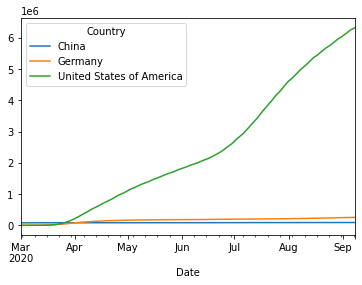

In [63]:
comp_tbl.unstack(1).plot()

### In conclusion

In this workshop we've seen how to do the following:

- Query an API with `requests` and parse a JSON response
- Use URL parameters in constructing our request
- Use `try` and `catch` to trap errors that might arise
- Use `pandas` to create a `DataFrame` from JSON data
- Use functions to encapsulate and reuse code
- Group, aggregate, and plot data with a `DataFrame`

For another set of examples that explore other API topics, see the material for last year's [Python for API's workshop](https://github.com/gwu-libraries/gwlibraries-workshops/blob/master/python-for-apis/python_api_workshop.ipynb), which covers retrieving data from API's with paginated results and using API keys. 

A closely related topic but one beyond the scope of our workshop is **web scraping**, which is useful when you need to extract data from a website that does not provide a REST API. There are a number of resources available on web scraping in Python, including the O'Reilly book [Web Scraping with Python](https://learning.oreilly.com/library/view/web-scraping-with/9781491985564/), available to GW students, faculty, and staff via our [Safari Tech Books](https://www.safaribooksonline.com/library/view/temporary-access) subscription.